In [1]:
from readin import *

#ms3data = readin_log("proteinGroups_MS3_simplified.txt")

<Figure size 1000x700 with 1 Axes>

<Figure size 1000x700 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 1000x700 with 1 Axes>

In [2]:
from readin import *
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

ms3data = readin_log("proteinGroups_MS3_simplified.txt")

C:\Users\M McCown\Jupyter\readin.py:105: RuntimeWarning: divide by zero encountered in log
  dfl = (np.log(df)).replace(-np.inf, 0)


In [3]:
leastValue = np.nanmin(ms3data.replace(0, np.nan).values)

# Variance Between Cell Lines

In [4]:
FOLD_CHANGE_THRESHOLD = 1 #Note that this is the line that
#                         Is drawn on the log2 fold change maps
# ie, 1 = 2 fold change

In [5]:
technical_replicates = {
    "Cell Line 1":[0,1,2],
    "Cell Line 2":[3,4,5],
    "Cell Line 3":[6,8]
    
}
    
#    "Cell Line 4":[10,11,12],
#    "Cell Line 5":[13,14,15],
#    "Cell Line 6":[16,18]


ms3Samples = {}
sample_aves = {}
leastValue = np.inf

for sample in technical_replicates:
    #
    reps = {}
    sample_proteins = {}
    for rep in technical_replicates[sample]:
        reps[ms3data.iloc[:,rep].name] = ms3data.iloc[:,rep]
    ms3Samples[sample] = pd.DataFrame.from_dict(reps, dtype = float)
        
    for r in range(0, len(list(reps.values())[0])):
        rep_for_protein = []
        p = ms3data.iloc[r].name
        for rep in reps.values():
            if rep[r] > 0: rep_for_protein.append(rep[r])
            if rep[r] > 0.0 and rep[r] < leastValue: leastValue=rep[r]
        if len(rep_for_protein) > 1: 
            sample_proteins[p] = mean(rep_for_protein)
        else: sample_proteins[p] = 0.0
    sample_aves[sample] = sample_proteins
sample_aves = pd.DataFrame.from_dict(sample_aves, dtype = float)

sample_names = []
for i in sample_aves:
    sample_names.append(i)

In [6]:
print(leastValue)
#print(fold_changes)

3.709294638856529


##### These are the same loops as below, to compare all lines to all lines without duplicates\n",
    "for i in range(0,len(sample_names)-1):\n",
    "\n",
    "    for o_ser_index in range(i+1,len(sample_names)):\n",
    "\n",
    "        print (i, o_ser_index)"

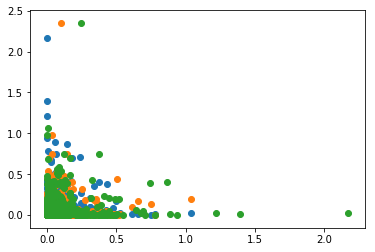

In [7]:
h = ms3data.shape[0]
variances = {}
var_flat = np.empty(shape = (h*15))
fold_changes = {}
flat_index = 0

for ser_index in range(0,len(sample_names)-1): #these are the keys to ms3Samples
    ser = sample_names[ser_index]
    sample_df1 = ms3Samples[ser]
    for o_ser_index in range(ser_index+1,len(sample_names)): #keys again
        variances_averaged = {} #used for graph to show v1 mostly the same as v2
        o_ser = sample_names[o_ser_index]
        #compare variance in sample versus otherSample
        sample_df2 = ms3Samples[o_ser]
        for protein in sample_df1.index:
            t1 = [x for x in sample_df1.loc[protein,:] if x != 0]
            t2 = [x for x in sample_df2.loc[protein,:] if x != 0]
            
            #print (t1)
            #print (t2)
            if len(t1) > 1: v1 = variance(t1)
            else: v1 = 0
            if len(t2) > 1: v2 = variance(t2)
            else: v2 = 0
            v = (v1+v2)/2
            variances_averaged[v1]=v2
            variances[((ser,o_ser),protein)] = v
            #this needs to implement the half-least-psuedo-zero to avoid divided by zero errors
            m2 =skipZeroMean(t2); m1 = skipZeroMean(t1)
            if m1 ==0: m1 = leastValue/2
            if m2 ==0: m2 = leastValue/2
            fold_changes[((ser,o_ser),protein)] = m2/m1
            var_flat[flat_index]=v
            flat_index +=1
        plt.scatter(variances_averaged.keys(), variances_averaged.values())

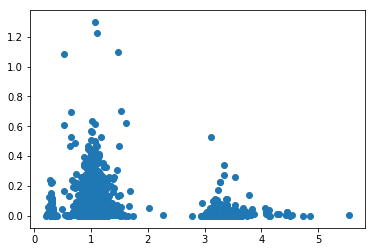

In [8]:
#Volcano Graph
plt.scatter(fold_changes.values(), variances.values())
plt.show()

    "##### Log-Normalized Technical Variance Thresholds\n",
    "###### Ignoring Zeros: \n",
    "###### 95% threshold:  0.2601427941399485\n",
    "###### 99% threshold:  0.5243715339788084"

In [9]:
#Log-Normalized Technical Variance Thresholds, Ignoring Zeros:
threshold95 = 0.2601427941399485
threshold99 = 0.5243715339788084

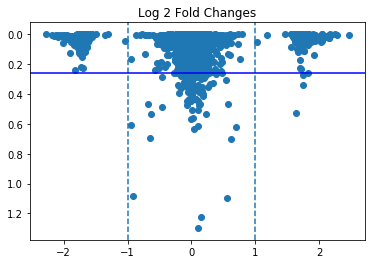

In [10]:
#Volcano Graph
plt.title("Log 2 Fold Changes")
log2_fold_changes = [math.log2(x) for x in fold_changes.values()]
plt.scatter(log2_fold_changes, variances.values())
plt.axvline(x=FOLD_CHANGE_THRESHOLD, linestyle='dashed')
plt.axvline(x=-FOLD_CHANGE_THRESHOLD, linestyle='dashed')
plt.axhline(y=threshold95, color='b', linestyle='-')
plt.gca().invert_yaxis()
plt.show()


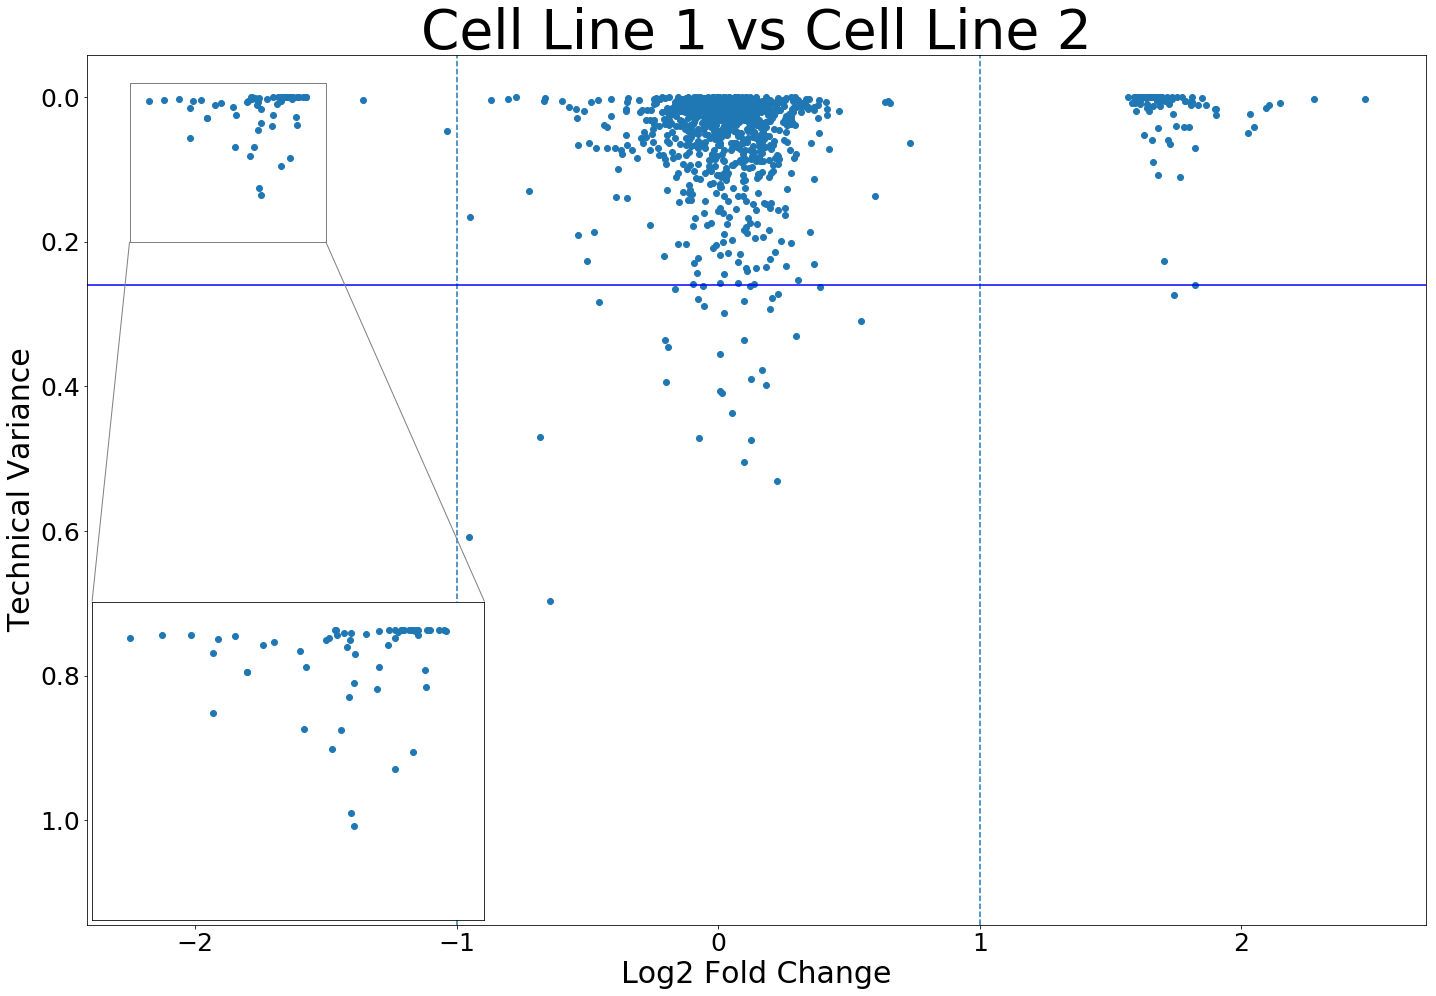

138 proteins change significantly, out of 1436 (9.61%)
77 proteins are upregulated, out of 1436 (5.36%)
61 proteins are downregulated, out of 1436 (4.25%)



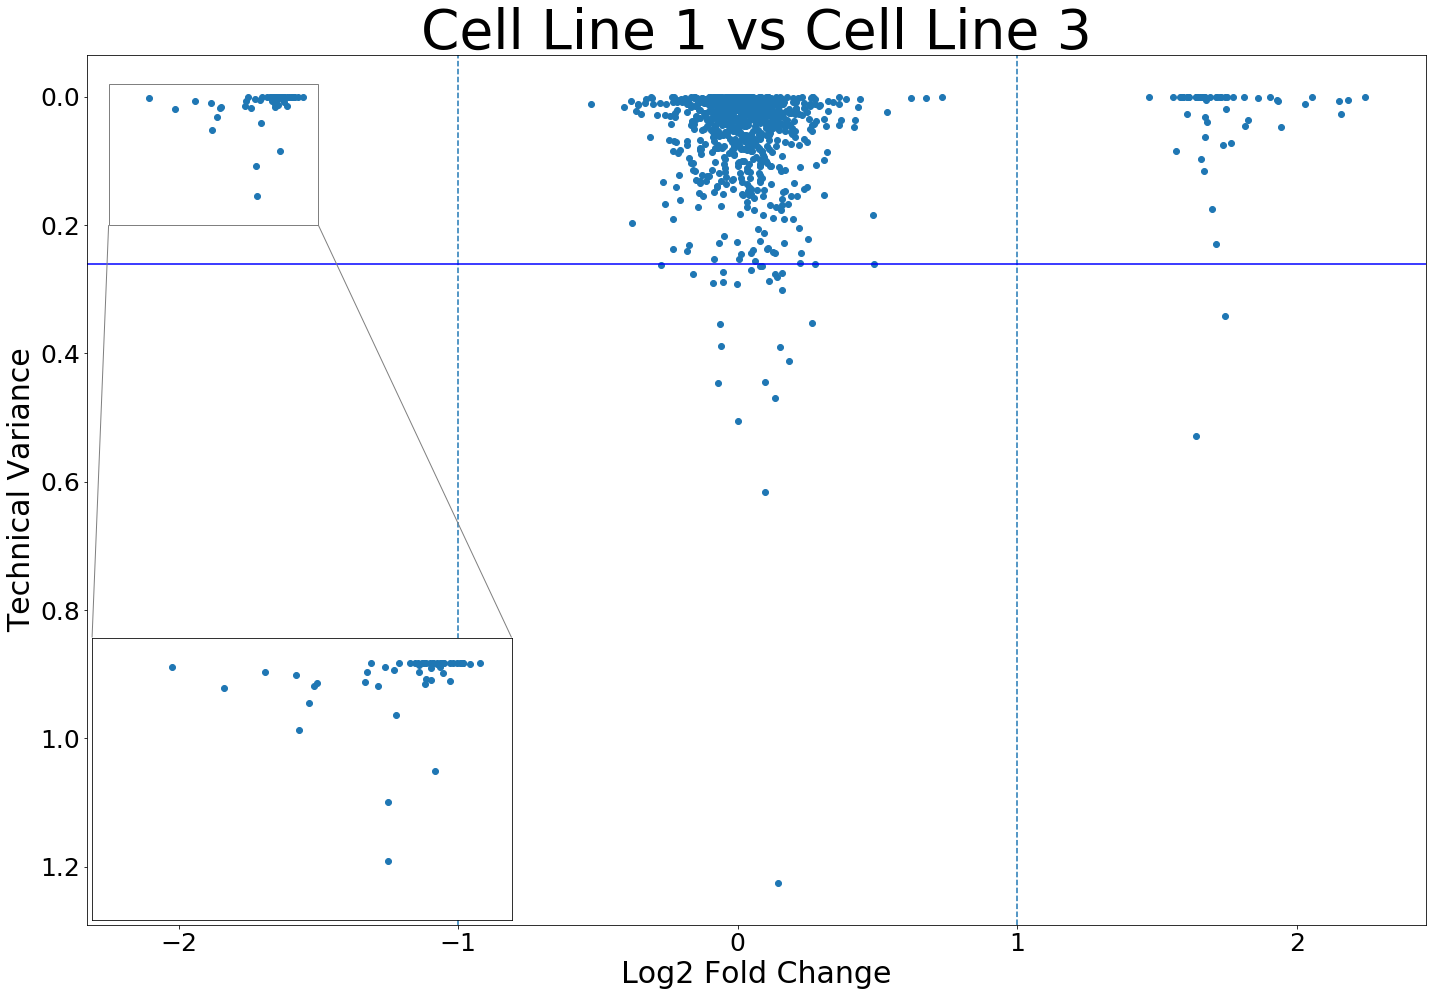

110 proteins change significantly, out of 1436 (7.66%)
56 proteins are upregulated, out of 1436 (3.90%)
54 proteins are downregulated, out of 1436 (3.76%)



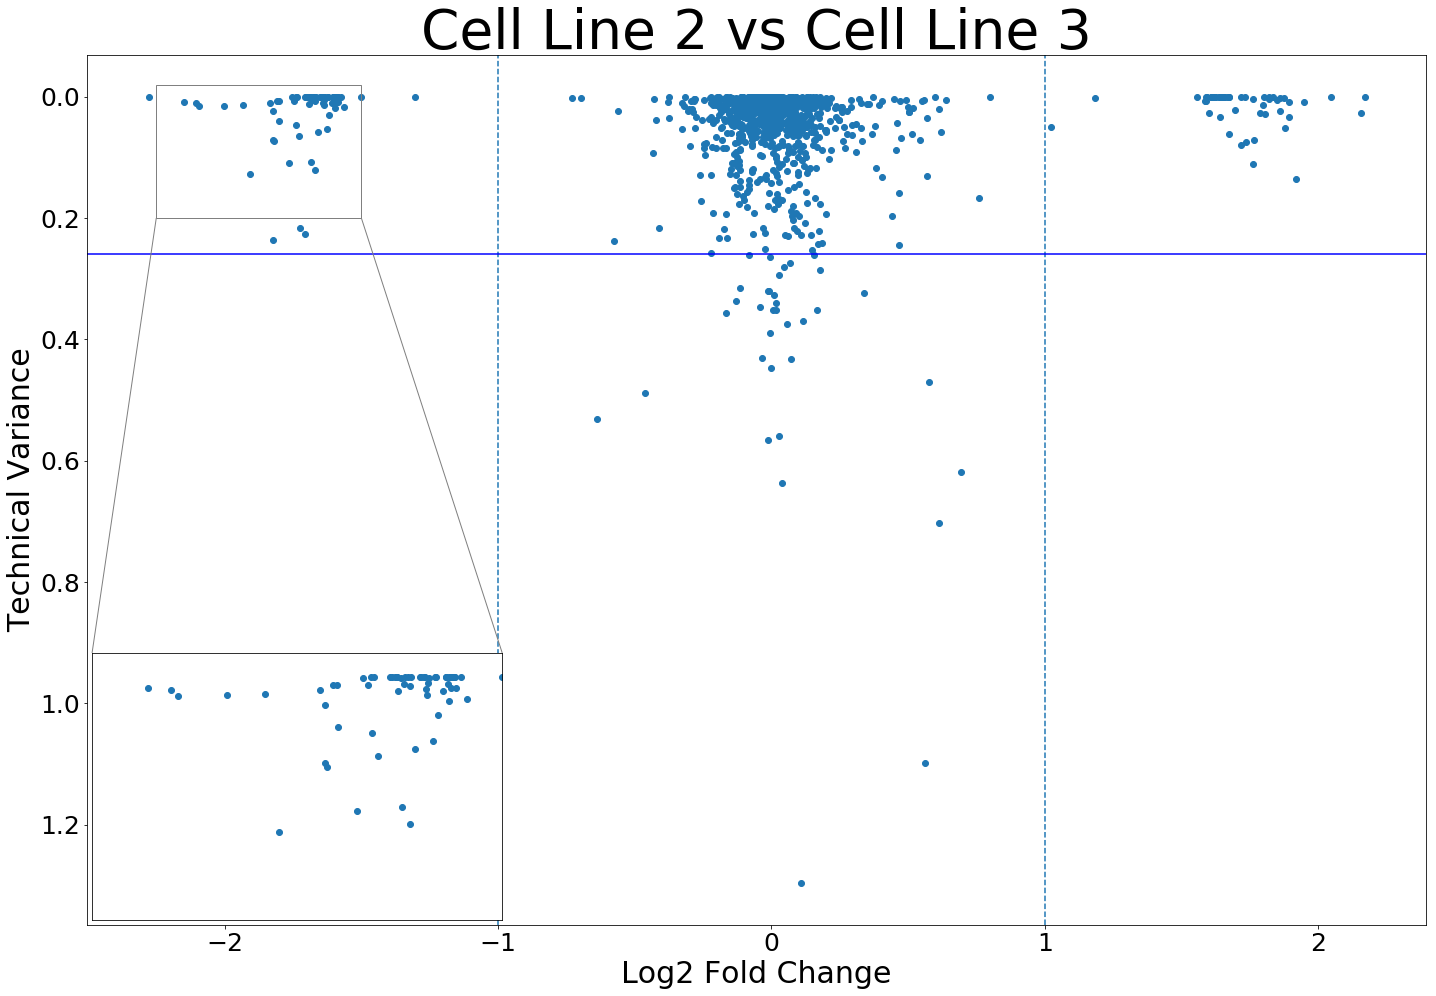

123 proteins change significantly, out of 1436 (8.57%)
55 proteins are upregulated, out of 1436 (3.83%)
68 proteins are downregulated, out of 1436 (4.74%)


In [11]:
REPORT_ALL=False
for ser_index in [0,1]:#range(0,len(sample_names)-1): 
    ser = sample_names[ser_index]
    for o_ser_index in range(ser_index+1,3):#len(sample_names)):
        print()
        o_ser = sample_names[o_ser_index]
        svo_fc = {x:fold_changes[x] for x in fold_changes if x[0] == (ser,o_ser)}
        svo_var = {x:variances[x] for x in variances if x[0] == (ser,o_ser)}
        
        log2_fold_changes = [math.log2(x) for x in svo_fc.values()]
        #fig = plt.figure(figsize=(12,8))
        
        plt.rc('axes', labelsize=30)
        plt.rc('xtick', labelsize=25)
        plt.rc('ytick', labelsize=25)
        plt.rc('axes', titlesize=55)
        
        fig, ax = plt.subplots() 
        fig.set_figheight(16)
        fig.set_figwidth(24)
        
        
        plt.title(ser+" vs "+o_ser)
        
        plt.scatter(log2_fold_changes, svo_var.values())
        
        plt.axvline(x=  FOLD_CHANGE_THRESHOLD, linestyle='dashed')
        plt.axvline(x= -FOLD_CHANGE_THRESHOLD, linestyle='dashed')
        #plt.axvline(x=  1.75, linestyle='dotted', alpha=.4)
        #plt.axvline(x= -2, linestyle='dotted', alpha=.4)
        plt.axhline(y=threshold95, color='b', linestyle='-')
        #plt.axhline(y=threshold99, color='b', linestyle='dotted', alpha=.4)
        plt.gca().invert_yaxis()
        
        plt.xlabel("Log2 Fold Change")
        plt.ylabel("Technical Variance")
        
        axins = zoomed_inset_axes(ax, 2, loc=3) 
        axins.scatter(log2_fold_changes, svo_var.values())
        axins.set_xlim(-2.25, -1.5) # apply the x-limits
        axins.set_ylim(-0.02, 0.2)
        axins.xaxis.set_visible(False)
        axins.yaxis.set_visible(False)
        axins.invert_yaxis()
        mark_inset(ax, axins, loc1=1, loc2=2, fc="none", ec="0.5")
        
        fig_name = str('figures/'+ser+' vs '+o_ser+'.jpeg')
        fig.savefig(fig_name, dpi=300)
        plt.show()
        
        weirdpoints = []
        for key in fold_changes:
            if abs(math.log2(fold_changes[key])) > FOLD_CHANGE_THRESHOLD:
                if variances[key] < threshold95:
                    if key[0] == ((ser,o_ser)):
                        weirdpoints.append(key)
            
        line_category_counts = {}#Example key = "Cell Line1 vs Cell line 2" value = number of occurances
        protein_category_counts = {}#Name:Frequency
        for key in weirdpoints:
            line_category = (key[0][0]+" vs "+key[0][1])
            if line_category in line_category_counts:
                line_category_counts[line_category] += 1
            else: line_category_counts[line_category] = 1
    
            protein = key[1]
            if protein in protein_category_counts:
                protein_category_counts[protein] += 1
            else:protein_category_counts[protein] = 1
        
        print ("{0} proteins change significantly, out of {1} ({2:.2f}%)"
               .format(len(protein_category_counts), ms3data.shape[0], 100*len(protein_category_counts)/ms3data.shape[0]))
        
        
        up_reg_points = []
        down_reg_points = []
        for key in weirdpoints:
            if fold_changes[key] > 1: up_reg_points.append(key)
            if fold_changes[key] < 1: down_reg_points.append(key)
        
        print ("{0} proteins are upregulated, out of {1} ({2:.2f}%)"
               .format(len(up_reg_points), ms3data.shape[0], len(up_reg_points)/ms3data.shape[0]*100))
        print ("{0} proteins are downregulated, out of {1} ({2:.2f}%)"
               .format(len(down_reg_points), ms3data.shape[0], len(down_reg_points)/ms3data.shape[0]*100))
        
        if REPORT_ALL==True:
            print("\nProtein\t\t  Fold Change\t\t Variance\n")
            for key in weirdpoints:
                print (key[1],"\t{0:.4f}".format(math.log2(fold_changes[key])),
                       "\t{0:.4f}".format(variances[key]))